#### The   technique of generating new features using the existing features is called __feature engineering__
    or we can say,feature engineering is the science of extracting more information from the existing data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [31]:
sum(data.isnull().sum())

0

## Feature Transformation

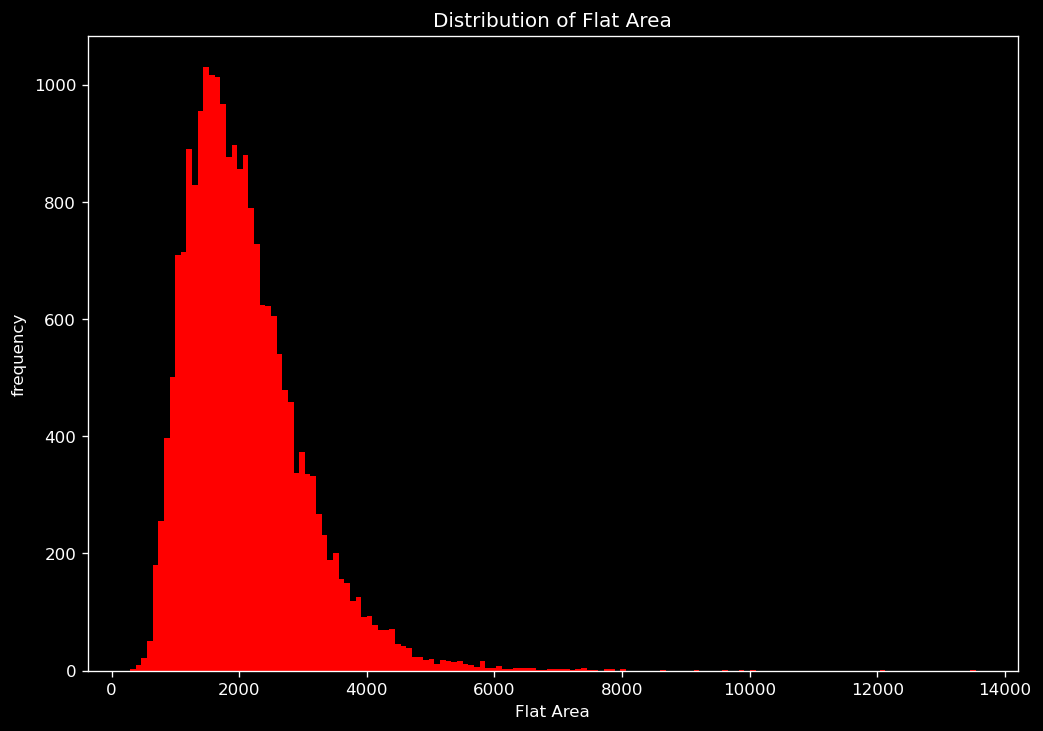

In [32]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

--  It can be clearly seen that,distribution of flat area is right skewed

In [54]:
def log_transform(sample_data):
    return np.log(sample_data)

In [55]:
data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

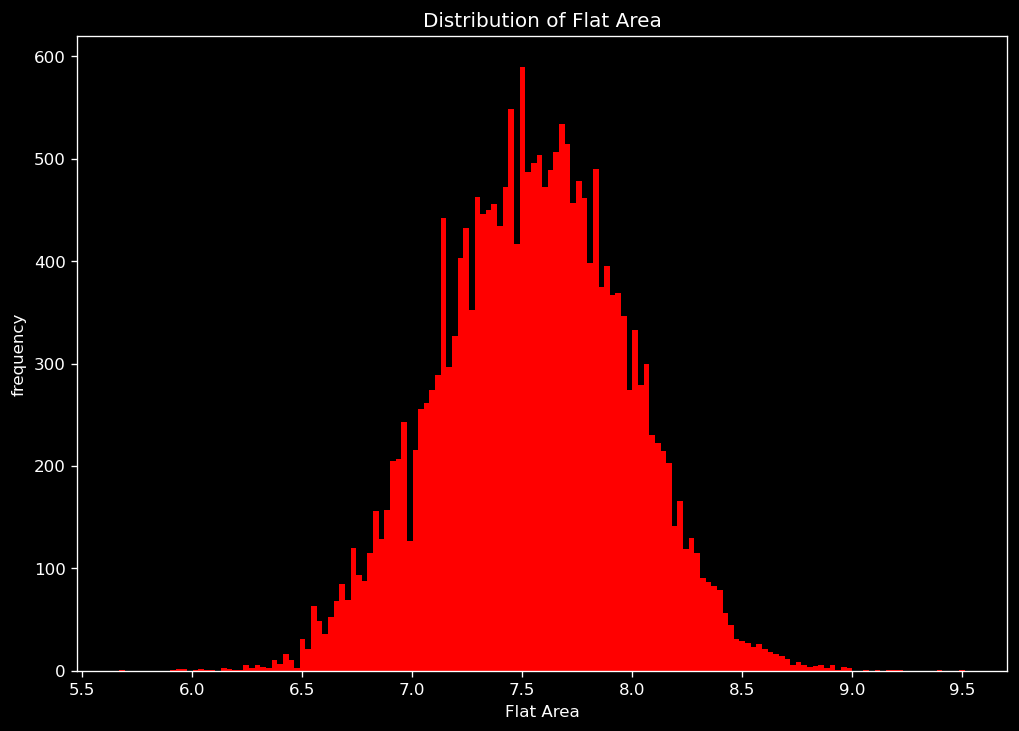

In [56]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

## Dummy/One Hot Encoding

In [36]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [37]:
dummy_var1 = pd.get_dummies( data['Condition of the House'], drop_first = True, prefix = 'Condition')
dummy_var1.head()

,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Okay
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [38]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [39]:
label_encoded = label_encoded.map({ 'Bad':1,
                                    'Okay':2,
                                    'Fair':3,
                                    'Good':4,
                                    'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning:
       - It si the process of aggregating data points in different categories to reduce redundancy.
       - It can be implemented on baoth categorical & numerical variable 

### `PLease check binning of zipcode in different group in other video

116

118

3

array(['very old', 'old', 'new'], dtype=object)

## Binning in sparse categories:
    The ones which occur for a negligible or few numbers of times as compared to size of the dataset.
    Lets check condition of the house column for this

In [45]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [46]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [57]:
mean = []

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

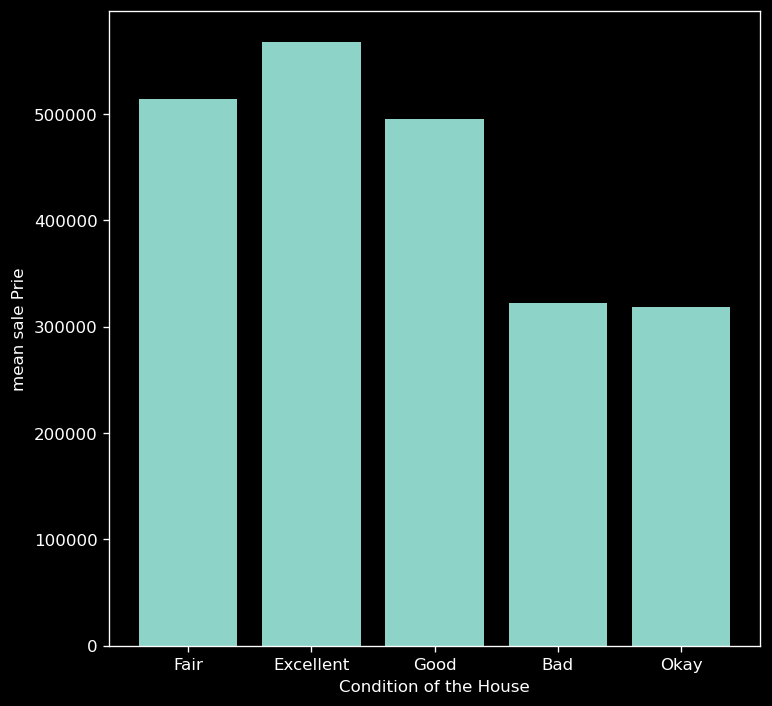

In [48]:
#plot to check condion of the house w.r.t mean sale price
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

- From the plot We can clearly infer that avg sale price for bad and okay categories are quite similar.Hence having these 2 categories as actually redundant.We can also see that avg sale price for good and fair categories are very similar.As a result ,we can reduce the no. of classes to 3 by the process of binning

In [58]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [59]:
mean = []

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

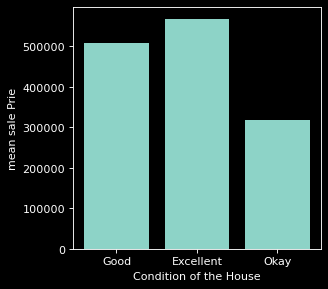

In [61]:
plt.figure( figsize = (4,4), dpi = 80)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

## Binning of continous variable

In [62]:
len(data['Age of House (in Years)'].unique())


116

In [63]:
data['Age of House (in Years)'].max()


118

In [64]:
data['Age of House (in Years)'].min()


3

#### to think:will there be any substancial difference b\w the selling price of a house of age 40 yrs and selling price of another house of age 42 yrs,given that all the other features are exactly same?
     The ans is no
    
### To reduce this redundacy we can use the concept of binning

In [67]:
def age_of_house(x):
    if x < 10:
        x = 'new'
    elif x < 50:
        x = 'old'
    else:
        x = 'very old'
    return x


In [68]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

##### Binning of continuous variable is not always required since it may result in loss of information
Here also,we have done it for learninng purpoe only

In [52]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

##    Weekdays is very important in problems such as traffic prediction,food stock demand prediction etc2

In [71]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data["month_sold"] = time.month
data['weekday_sold'] = time.day_name()
data['date_sold'] = time.days_in_month

data[['year_sold','month_sold','weekday_sold','date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


In [81]:
month_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'month_sold',
                aggfunc = 'mean')

month_sale

month_sold,1,2,3,4,5,6,7,8,9,10,11,12
Sale Price,494549.626789,485457.269015,515501.697439,533078.767817,518714.583092,527367.035337,519160.693351,507810.789691,502577.903044,508442.986155,495134.871722,497170.721278


Text(0, 0.5, 'mean_sale')

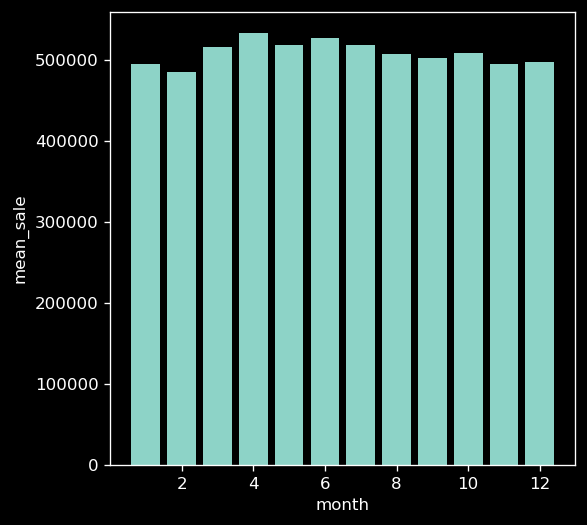

In [82]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(month_sale.columns, month_sale.iloc[0])
plt.xlabel("month")
plt.ylabel('mean_sale')

In [83]:
weekday_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'weekday_sold',
                aggfunc = 'mean')

weekday_sale

weekday_sold,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sale Price,520448.811624,499055.835999,508442.986155,518714.583092,500126.758398,506753.572298,527367.035337


Text(0, 0.5, 'mean_sale')

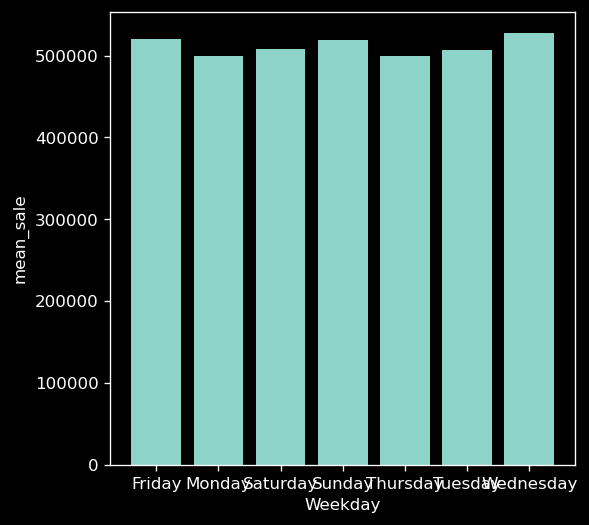

In [84]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [85]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold',
                aggfunc = 'mean')

date_sale

date_sold,29,30,31
Sale Price,485457.269015,517266.623436,510817.80564


Text(0, 0.5, 'mean_sale')

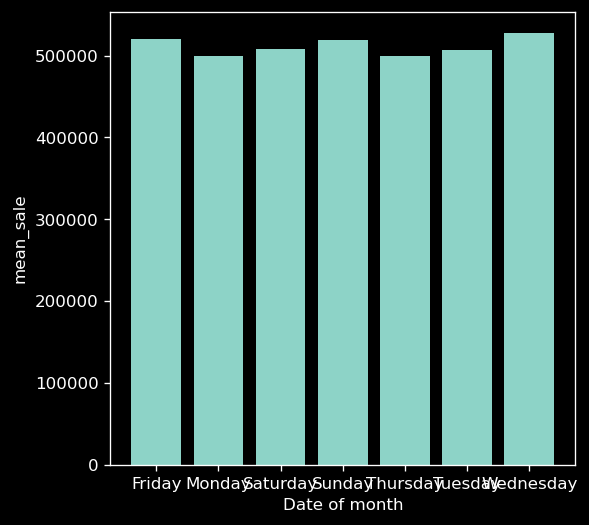

In [86]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Date of month")
plt.ylabel('mean_sale')

Text(0, 0.5, 'frequency ratio')

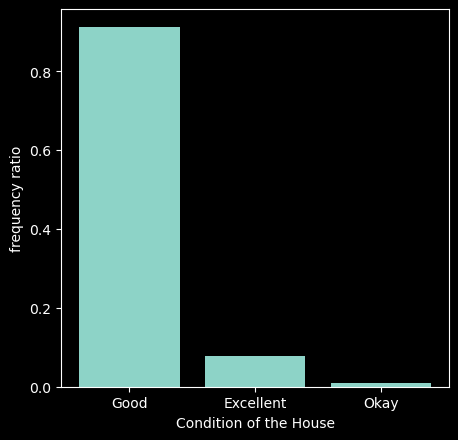

In [87]:
freq_condition = data['Condition of the House'].value_counts()
freq_condition = freq_condition/freq_condition.sum()

plt.figure( figsize = (5,5), dpi = 100)
plt.bar(freq_condition.index, freq_condition)
plt.xlabel('Condition of the House')
plt.ylabel('frequency ratio')

In [88]:
data['freq_cond'] = 0

for i in data['Condition of the House'].unique():
  data['freq_cond'][data['Condition of the House']==i] = freq_condition.loc[i]

data['freq_cond'].head()

0    0.911935
1    0.911935
2    0.911935
3    0.078717
4    0.911935
Name: freq_cond, dtype: float64

In [89]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Transformed Flat Area',
       'year_sold', 'month_sold', 'weekday_sold', 'date_sold', 'freq_cond'],
      dtype='object')

In [90]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Excellent','Good']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2 :
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
data['luxury_home'].value_counts()

No     11285
Yes    10324
Name: luxury_home, dtype: int64

In [92]:
luxury = data.pivot_table(values = "Sale Price", columns = 'luxury_home', aggfunc = 'mean' )
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, ' Mean Sale Price')

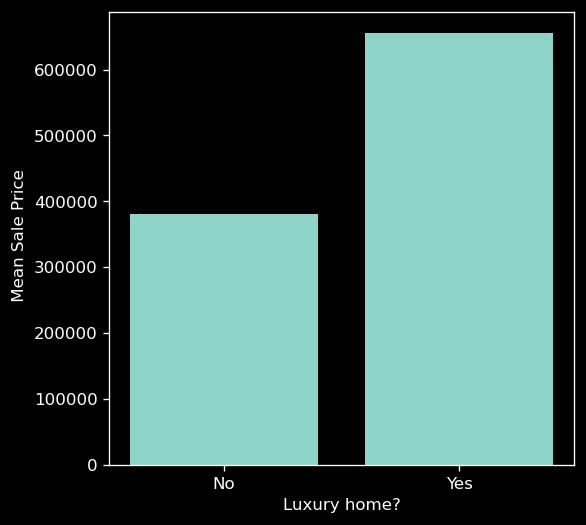

In [93]:
plt.figure(figsize = (5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel(" Mean Sale Price")


In [94]:
import os
import multiprocessing

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
print("RAM: %f GB" % mem_gib)
print("CORES: %d" % multiprocessing.cpu_count())

AttributeError: module 'os' has no attribute 'sysconf'